In [1]:
#importing packages
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
plt.style.use('ggplot')
from scipy.stats import norm
from scipy import stats
%matplotlib inline

In [2]:
#so all DataFrame data is displayed
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',1000)

In [3]:
ZRI = pd.read_csv('./data/Zip_Zri_MultiFamilyResidenceRental.csv', index_col=0,dtype={'RegionName': 'str'})


In [4]:
ZRI.head(1)

,RegionName,City,State,Metro,CountyName,SizeRank,2010-09,2010-10,2010-11,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12,2012-01,2012-02,2012-03,2012-04,2012-05,2012-06,2012-07,2012-08,2012-09,2012-10,2012-11,2012-12,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,2013-11,2013-12,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12,2020-01
RegionID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
61639,10025,New York,NY,New York-Newark-Jersey City,New York County,1,2930.0,2952.0,2926.0,2904.0,2866.0,2828.0,2799.0,2791.0,2797.0,2823.0,2843.0,2858.0,2882.0,2909.0,2914.0,2943.0,2962.0,2980.0,2995.0,3014.0,3017.0,3045.0,3083.0,3124.0,3161.0,3157.0,3184.0,3234.0,3241.0,3231.0,3226.0,3226.0,3236.0,3248.0,3270.0,3267.0,3272.0,3282.0,3301.0,3324.0,3333.0,3338.0,3340.0,3323.0,3316.0,3318.0,3348.0,3367.0,3432.0,3459.0,3504.0,3523.0,3566.0,3576.0,3595.0,3610.0,3620.0,3655.0,3685.0,3673.0,3694.0,3655.0,3658.0,3681.0,3656.0,3616.0,3573.0,3555.0,3596.0,3678.0,3738.0,3753.0,3762.0,3749.0,3759.0,3794.0,3771.0,3761.0,3735.0,3754.0,3741.0,3784.0,3774.0,3783.0,3787.0,3749.0,3727.0,3769.0,3727.0,3671.0,3591.0,3556.0,3545.0,3519.0,3545.0,3570.0,3609.0,3640.0,3638.0,3612.0,3509.0,3474.0,3467.0,3484.0,3523.0,3573.0,3622.0,3664.0,3698.0,3704.0,3692.0,3715.0,3676.0


In [5]:
ZRI.shape

(1861, 119)

In [6]:
ZRI.describe()

,SizeRank,2010-09,2010-10,2010-11,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12,2012-01,2012-02,2012-03,2012-04,2012-05,2012-06,2012-07,2012-08,2012-09,2012-10,2012-11,2012-12,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,2013-11,2013-12,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12,2020-01
count,1861.000000,728.000000,691.000000,738.000000,740.000000,710.000000,722.000000,732.000000,747.000000,764.000000,769.000000,790.000000,804.000000,786.000000,778.000000,782.000000,758.000000,804.000000,804.000000,814.000000,805.000000,790.000000,804.000000,802.000000,829.000000,837.000000,844.000000,840.000000,857.000000,857.000000,860.000000,857.000000,860.000000,853.000000,848.000000,832.000000,843.000000,841.000000,833.000000,824.000000,836.000000,846.000000,1139.000000,1361.000000,1370.000000,1372.000000,1374.000000,1339.000000,1344.000000,1342.000000,1366.000000,1379.000000,1384.000000,1417.000000,1431.000000,1421.000000,1417.000000,1391.000000,1391.000000,1406.000000,1411.000000,1395.000000,1412.000000,1418.000000,1424.000000,1462.000000,1484.000000,1484.000000,1480.000000,1468.000000,1471.00000,1475.000000,1475.000000,1456.000000,1482.000000,1487.000000,1501.000000,1520.000000,1535.000000,1523.000000,1526.000000,1518.000000,1521.00000,1519.000000,1527.000000,1512.000000,1526.000000,1533.000000,1537.000000,1539.000000,1544.000000,1543.000000,1545.000000,1540.000000,1574.000000,1584.000000,1601.000000,1612.000000,1604.000000,1598.000000,1585.000000,1391.000000,1510.000000,1540.000000,1564.000000,1598.000000,1623.000000,1654.000000,1668.000000,1705.000000,1528.000000,1575.000000,1618.000000,1607.000000
mean,931.000000,1341.089286,1333.994211,1343.094851,1346.445946,1337.508451,1335.185596,1337.397541,1333.896921,1327.984293,1317.977893,1312.156962,1296.073383,1302.727735,1311.386889,1318.592072,1322.023747,1309.297264,1315.792289,1324.673219,1318.360248,1322.116456,1330.541045,1338.644638,1352.328106,1359.063321,1362.263033,1369.592857,1363.892649,1366.702450,1368.746512,1369.070012,1376.997674,1391.062134,1389.573113,1404.516827,1412.014235,1429.856124,1442.252101,1450.870146,1443.915072,1440.739953,1389.744513,1384.216018,1390.873723,1393.109329,1393.017467,1397.654966,1417.966518,1425.301043,1431.786237,1440.770848,1448.260116,1449.235709,1451.579315,1462.773399,1464.947071,1479.574407,1491.938893,1503.093883,1513.630758,1529.293190,1531.556657,1541.988717,1545.167837,1535.369357,1537.570081,1547.295148,1555.561486,1572.072888,1579.10741,1586.395254,1596.357966,1604.251374,1601.219973,1604.089442,1597.917388,1589.543421,1581.649511,1586.341431,1588.800786,1599.845191,1605.87574,1613.295589,1614.586771,1618.806878,1609.754915,1615.320287,1601.044242,1597.532164,1597.621114,1610.504861,1613.850485,1613.233766,1626.048920,1625.181187,1631.561524,1629.423077,1646.109102,1636.525657,1632.071293,1647.659238,1637.125166,1632.710390,1636.154731,1633.275344,1640.393099,1648.356711,1667.882494,1657.188856,1678.632199,1653.819683,1659.628554,1655.571251
std,537.368744,525.076555,511.310252,511.744002,503.266930,489.689521,488.016673,488.147930,486.222768,490.892481,497.980736,503.931557,508.956034,505.672321,512.407539,511.089297,515.117793,518.219665,520.697660,524.069305,527.050468,537.823421,536.395023,544.718743,552.466799,556.892031,558.200912,557.833085,559.574089,560.851286,564.183526,568.388102,572.342492,576.500147,583.161

In [7]:
#show columns with missing values
ZRI.columns[ZRI.isnull().any()]

Index(['Metro', '2010-09', '2010-10', '2010-11', '2010-12', '2011-01',
       '2011-02', '2011-03', '2011-04', '2011-05',
       ...
       '2019-04', '2019-05', '2019-06', '2019-07', '2019-08', '2019-09',
       '2019-10', '2019-11', '2019-12', '2020-01'],
      dtype='object', length=114)

In [8]:
len(ZRI.RegionName.unique())

1861

In [9]:
len(ZRI.City.unique())

770

In [10]:
len(ZRI.SizeRank.unique())

1861

In [11]:
len(ZRI.State.unique())

46

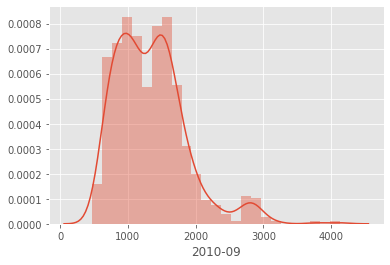

In [12]:
sns.distplot(ZRI['2010-09'])

In [13]:
#dataframe with only year-month columns
bymonth = ZRI.iloc[:,6:119]

In [14]:
bymonth

,2010-09,2010-10,2010-11,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12,2012-01,2012-02,2012-03,2012-04,2012-05,2012-06,2012-07,2012-08,2012-09,2012-10,2012-11,2012-12,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,2013-11,2013-12,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12,2020-01
RegionID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
61639,2930.0,2952.0,2926.0,2904.0,2866.0,2828.0,2799.0,2791.0,2797.0,2823.0,2843.0,2858.0,2882.0,2909.0,2914.0,2943.0,2962.0,2980.0,2995.0,3014.0,3017.0,3045.0,3083.0,3124.0,3161.0,3157.0,3184.0,3234.0,3241.0,3231.0,3226.0,3226.0,3236.0,3248.0,3270.0,3267.0,3272.0,3282.0,3301.0,3324.0,3333.0,3338.0,3340.0,3323.0,3316.0,3318.0,3348.0,3367.0,3432.0,3459.0,3504.0,3523.0,3566.0,3576.0,3595.0,3610.0,3620.0,3655.0,3685.0,3673.0,3694.0,3655.0,3658.0,3681.0,3656.0,3616.0,3573.0,3555.0,3596.0,3678.0,3738.0,3753.0,3762.0,3749.0,3759.0,3794.0,3771.0,3761.0,3735.0,3754.0,3741.0,3784.0,3774.0,3783.0,3787.0,3749.0,3727.0,3769.0,3727.0,3671.0,3591.0,3556.0,3545.0,3519.0,3545.0,3570.0,3609.0,3640.0,3638.0,3612.0,3509.0,3474.0,3467.0,3484.0,3523.0,3573.0,3622.0,3664.0,3698.0,3704.0,3692.0,3715.0,3676.0
84654,1447.0,1465.0,1469.0,1467.0,1467.0,1472.0,1479.0,1492.0,1497.0,1502.0,1512.0,1514.0,1510.0,1506.0,1507.0,1502.0,1494.0,1497.0,1497.0,1505.0,1518.0,1526.0,1541.0,1562.0,1570.0,1579.0,1582.0,1589.0,1582.0,1581.0,1585.0,1590.0,1603.0,1618.0,1638.0,1658.0,1669.0,1651.0,1647.0,1652.0,1647.0,1645.0,1635.0,1650.0,1660.0,1665.0,1670.0,1666.0,1677.0,1686.0,1682.0,1672.0,1672.0,1679.0,1678.0,1680.0,1687.0,1703.0,1728.0,1746.0,1755.0,1755.0,1749.0,1746.0,1732.0,1726.0,1726.0,1739.0,1760.0,1791.0,1824.0,1836.0,1841.0,1827.0,1802.0,1778.0,1770.0,1772.0,1784.0,1789.0,1800.0,1820.0,1824.0,1818.0,1804.0,1782.0,1765.0,1746.0,1735.0,1727.0,1740.0,1758.0,1780.0,1800.0,1802.0,1794.0,1783.0,1773.0,1755.0,1738.0,1723.0,1714.0,1718.0,1731.0,1749.0,1768.0,1787.0,1801.0,1806.0,1789.0,1761.0,1747.0,1731.0
61637,2797.0,2811.0,2813.0,2784.0,2736.0,2675.0,2667.0,2680.0,2692.0,2707.0,2719.0,2738.0,2759.0,2769.0,2786.0,2821.0,2841.0,2869.0,2888.0,2904.0,2909.0,2932.0,2958.0,2972.0,2967.0,2966.0,2984.0,2994.0,3007.0,3013.0,2991.0,2996.0,3010.0,3049.0,3070.0,3078.0,3096.0,3093.0,3119.0,3127.0,3135.0,3138.0,3136.0,3131.0,3118.0,3122.0,3117.0,3117.0,3170.0,3252.0,3325.0,3368.0,3413.0,3424.0,3425.0,3446.0,3469.0,3508.0,3560.0,3596.0,3652.0,3639.0,3630.0,3625.0,3582.0,3537.0,3498.0,3475.0,3467.0,3503.0,3546.0,3546.0,3520.0,3525.0,3527.0,3514.0,3490.0,3488.0,3510.0,3554.0,3561.0,3590.0,3587.0,3626.0,3651.0,3671.0,3667.0,3647.0,3609.0,3602.0,3580.0,3573.0,3556.0,3500.0,3508.0,3507.0,3533.0,3567.0,3579.0,3584.0,3515.0,3484.0,3457.0,3449.0,3459.0,3479.0,3491.0,3510.0,3521.0,3574.0,3608.0,3561.0,NaN
91982,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1081.0,1093.0,1113.0,1118.0,1116.0,1118.0,1117.0,1112.0,1091.0,1111.0,1137.0,1161.0,1175.0,1197.0,1214.0,1214.0,1242.0,1276.0,1304.0,1320.0,1297.0,1292.0,1295.0,1289.0,1283.0,1287.0,1283.0,1276.0,1249.0,1246.0,1250.0,1235.0,1220.0,1208.0,1203.0,1193.0,1186.0,1173.0,1170.0,1170.0,1180.0,1188.0,1182.0,1189.0,1191.0,1201.0,1214.0,1218.0,1214.0,1222.0,1233.0,1237.0,1225.0,1223.0,1228.0,1244.0,1251.0,1282.0,1255.

In [220]:
#melt zri dataframe
ZRI_f = pd.melt(ZRI, id_vars =['RegionName', 'City', 'State', 'Metro', 'CountyName', 'SizeRank'], value_vars=ZRI.iloc[:,6:119])



In [221]:
ZRI_f.columns[ZRI_f.isnull().any()]

Index(['Metro', 'value'], dtype='object')

In [222]:
ZRI_f = ZRI_f.dropna(subset=['value'])

In [223]:
ZRI_f.shape

(140035, 8)

In [17]:
ZRI_f.head()

,RegionName,City,State,Metro,CountyName,SizeRank,variable,value
0,10025,New York,NY,New York-Newark-Jersey City,New York County,1,2010-09,2930.0
1,60657,Chicago,IL,Chicago-Naperville-Elgin,Cook County,2,2010-09,1447.0
2,10023,New York,NY,New York-Newark-Jersey City,New York County,3,2010-09,2797.0
3,77494,Katy,TX,Houston-The Woodlands-Sugar Land,Harris County,4,2010-09,NaN
4,60614,Chicago,IL,Chicago-Naperville-Elgin,Cook County,5,2010-09,1437.0


In [225]:
# Convert and mutate date columns
#get month and Year columns
ZRI_f['variable'] = pd.to_datetime(ZRI_f['variable'])
ZRI_f['Month'] = ZRI_f['variable'].dt.month
ZRI_f['Year'] = ZRI_f['variable'].dt.year


In [19]:
ZRI_f.head()

,RegionName,City,State,Metro,CountyName,SizeRank,variable,value,Month,Year
0,10025,New York,NY,New York-Newark-Jersey City,New York County,1,2010-09-01,2930.0,9,2010
1,60657,Chicago,IL,Chicago-Naperville-Elgin,Cook County,2,2010-09-01,1447.0,9,2010
2,10023,New York,NY,New York-Newark-Jersey City,New York County,3,2010-09-01,2797.0,9,2010
3,77494,Katy,TX,Houston-The Woodlands-Sugar Land,Harris County,4,2010-09-01,NaN,9,2010
4,60614,Chicago,IL,Chicago-Naperville-Elgin,Cook County,5,2010-09-01,1437.0,9,2010


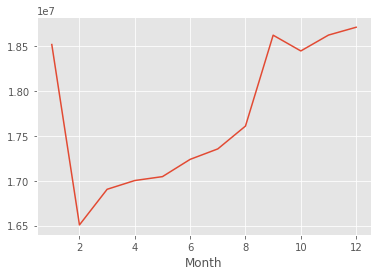

In [20]:
# How does Zillow ZRI vary by month by location?

ZRI_f.groupby('Month')['value'].sum().plot()


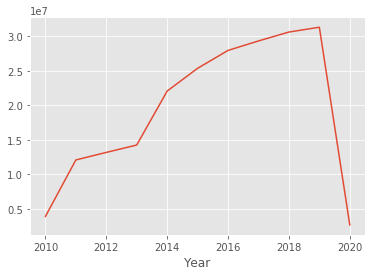

In [21]:
# Does ZRI always increase? Mostly increase?

ZRI_f.groupby('Year')['value'].sum().plot()


In [22]:
# Does ZRI rate of change depend on area significantly?
ZRI_f.groupby('State')['value'].sum()



State
AK      472906.0
AL        4347.0
AR      199516.0
AZ     1718868.0
CA    43982990.0
CO     3602210.0
CT     6738328.0
DC     2782430.0
FL    16874532.0
GA     3340355.0
HI      478714.0
IA       70278.0
IL     7477366.0
IN      842582.0
KS      852994.0
KY      318049.0
LA      182652.0
MA    20613348.0
MD     2742701.0
ME      943912.0
MI      266788.0
MN     1991776.0
MO     1964753.0
MT      337460.0
NC     1926374.0
ND      230921.0
NH      964378.0
NJ     2665852.0
NM      177293.0
NV     1014153.0
NY    46704593.0
OH     2562561.0
OK      120197.0
OR     1848916.0
PA     4857755.0
RI     2088629.0
SC      679376.0
TN     1393146.0
TX    13484802.0
UT      687196.0
VA     5466974.0
VT       82929.0
WA     4626612.0
WI     2074790.0
WV      121491.0
WY        3427.0
Name: value, dtype: float64

In [23]:
#season trends 

def month_to_season(month):
    if month in range(3,5):
        month = 'spring'
    elif month in range(6,8):
        month = 'summer'
    elif month in range(9,11):
        month = 'fall'
    else:
        month = 'winter'
    return(month)

ZRI_f['Season'] = ZRI_f.Month.apply(month_to_season)

In [24]:
season_rent = ZRI_f.groupby(['Season']).agg({"value": 'median'})

In [25]:
season_rent

,value
Season,
fall,1404.0
spring,1377.0
summer,1390.0
winter,1399.0


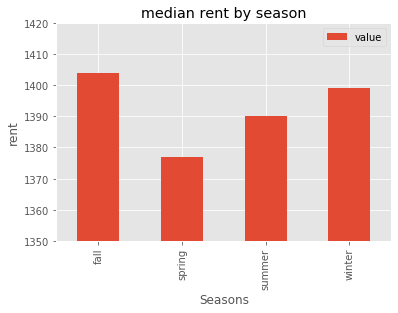

In [26]:
season_rent = ZRI_f.groupby(['Season']).agg({"value": 'median'})

season_rent.plot.bar()
plt.title('median rent by season')
plt.xlabel('Seasons')
plt.ylabel('rent')
plt.ylim(1350,1420)
plt.show()

In [226]:
#make all zip codes be 5 digits
ZRI_f['RegionName'] = ZRI_f['RegionName'].str.rjust(5, '0')


# Merging External Data frames

### importing IRS 2011 - 2018 data

source: https://www.irs.gov/statistics/soi-tax-stats-individual-income-tax-statistics-zip-code-data-soi

In [28]:
#reading CSVs in 
IRS18 = pd.read_csv('./data/IRS/18zpallagi.csv', dtype={'zipcode': 'str'})
IRS17 = pd.read_csv('./data/IRS/17zpallagi.csv', dtype={'zipcode': 'str'})
IRS16 = pd.read_csv('./data/IRS/16zpallagi.csv', dtype={'zipcode': 'str'})
IRS15 = pd.read_csv('./data/IRS/15zpallagi.csv', dtype={'zipcode': 'str'})
IRS14 = pd.read_csv('./data/IRS/14zpallagi.csv', dtype={'zipcode': 'str'})
IRS13 = pd.read_csv('./data/IRS/13zpallagi.csv', dtype={'zipcode': 'str'})
IRS12 = pd.read_csv('./data/IRS/12zpallagi.csv', dtype={'zipcode': 'str'})
IRS11 = pd.read_csv('./data/IRS/11zpallagi.csv', dtype={'ZIPCODE': 'str'})


In [29]:
IRS18.head(10)

,STATEFIPS,STATE,zipcode,agi_stub,N1,mars1,MARS2,MARS4,ELF,CPREP,PREP,DIR_DEP,N2,NUMDEP,TOTAL_VITA,VITA,TCE,VITA_EIC,RAC,ELDERLY,A00100,N02650,A02650,N00200,A00200,N00300,A00300,N00600,A00600,N00650,A00650,N00700,A00700,N00900,A00900,N01000,A01000,N01750,A01750,SCHF,N02300,A02300,N02500,A02500,N26270,A26270,N02900,A02900,N03220,A03220,N03300,A03300,N03270,A03270,N03150,A03150,N03210,A03210,N04450,A04450,N04100,A04100,N04200,A04200,N04470,A04470,A00101,N17000,A17000,N18425,A18425,N18450,A18450,N18500,A18500,N18800,A18800,N18460,A18460,N18300,A18300,N19300,A19300,N19500,A19500,N19530,A19530,N19570,A19570,N19700,A19700,N20950,A20950,N04475,A04475,N04800,A04800,N05800,A05800,N09600,A09600,N05780,A05780,N07100,A07100,N07300,A07300,N07180,A07180,N07230,A07230,N07240,A07240,N07225,A07225,N07260,A07260,N09400,A09400,N85770,A85770,N85775,A85775,N09750,A09750,N10600,A10600,N59660,A59660,N59720,A59720,N11070,A11070,N10960,A10960,N11560,A11560,N06500,A06500,N10300,A10300,N85530,A85530,N85300,A85300,N11901,A11901,N11900,A11900,N11902,A11902,N12000,A12000
0,1,AL,00000,1,768120.0,466830.0,90960.0,198750.0,696930.0,37470.0,399160.0,559820.0,1180240.0,439980.0,24700.0,16610.0,8100.0,5300.0,193550.0,146430.0,10119915.0,768120.0,10261015.0,611200.0,8093820.0,90050.0,58326.0,38280.0,64851.0,34310.0,42808.0,7120.0,3777.0,139800.0,722620.0,31400.0,41473.0,113700.0,1189581.0,7000.0,15830.0,43516.0,38750.0,77300.0,6930.0,15664.0,131500.0,141100.0,990.0,241.0,0.0,0.0,6190.0,23263.0,1090.0,3502.0,15210.0,13308.0,757310.0,10764175.0,757310.0,10566472.0,106960.0,197747.0,9240.0,191667.0,164035.0,6690.0,96737.0,2010.0,2905.0,4000.0,3837.0,3640.0,4983.0,2960.0,821.0,7060.0,13887.0,8500.0,17163.0,3230.0,22987.0,0.0,0.0,80.0,20.0,80.0,178.0,5740.0,21717.0,130.0,3878.0,18950.0,12328.0,300940.0,1549172.0,302810.0,160711.0,0.0,0.0,13280.0,5130.0,138350.0,48039.0,1480.0,60.0,7130.0,2561.0,25030.0,11849.0,35440.0,6290.0,72640.0,25221709.0,470.0,442.0,109110.0,151679.0,49840.0,445567.0,52070.0,457574.0,8020.0,4656.0,705730.0,1956009.0,335090.0,1029252.0,309520.0,925357.0,206770.0,327356.0,46740.0,42649.0,19410.0,12495.0,192210.0,112117.0,298790.0,272245.0,0.0,0.0,0.0,0.0,59030.0,50007.0,669420.0,1732176.0,666750.0,1725286.0,2730.0,4220.0
1,1,AL,00000,2,503430.0,225110.0,130060.0,134320.0,457510.0,23180.0,266880.0,371440.0,977450.0,348420.0,12230.0,8350.0,3880.0,350.0,124380.0,112920.0,18156451.0,503430.0,18322144.0,432240.0,14986384.0,91220.0,69033.0,37860.0,90397.0,34020.0,62140.0,35400.0,20927.0,68680.0,265689.0,30540.0,82058.0,110070.0,2117606.0,8690.0,12010.0,32992.0,92360.0,636314.0,10010.0,83850.0,91880.0,165693.0,11300.0,2751.0,90.0,1191.0,6320.0,30840.0,5980.0,20613.0,41070.0,41880.0,481320.0,8110725.0,481320.0,7967317.0,74380.0,144817.0,22700.0,489546.0,884834.0,15530.0,194895.0,14390.0,27454.0,7460.0,10161.0,13050.0,15803.0,12800.0,4937.0,18700.0,49692.0,22160.0,62294.0,11920.0,78556.0,0.0,0.0,40.0,39.0,190.0,798.0,19140.0,114790.0,1040.0,11427.0,40560.0,60939.0,498580.0,9420159.0,495880.0,1030009.0,0.0,0.0,17000.0,14634.0,252860.0,306377.0,6300.0,367.0,30100.0,18147.0,41720.0,44021.0,89680.0,18397.0,183090.0,219324614.0,5260.0,7424.0,39300.0,92618.0,28510.0,243637.0,29770.0,258173.0,16630.0,11567.0,490520.0,1960001.0,143650.0,316107.0,129100.0,280354.0,128110.0,252063.0,28980.0,25862.0,6210.0,6244.0,351410.0,725087.0,376800.0,834109.0,0.0,0.0,0.0,0.0,77300.0,111047.0,424280.0,1230668.0,420960.0,1220934.0,4110.0,9399.0
2,1,AL,00000,3,274590.0,95560.0,131770.0,41020.0,248630.0,13210.0,157800.0,179490.0,587740.0,182370.0,3110.0,1590.0,1520.0,0.0,45970.0,80580.0,16867358.0,274590.0,17015570.0,233850.0,12992584.0,84410.0,71942.0,38560.0,126299.0,34850.0,88256.0,49180.0,34350.0,43620.0,275245.0,32070.0,131901.0,82600.0,2245803.0,8180.0,4940.0,16035.0,66490.0,1034877.0,11000.0,119054.0,68510.0,148212.0,9060.0,2306.0,70.0,1070.0,4790.0,31591.0,5090.0,22261.0,30360.0,33978.0,248770.0,4768913.0,248770.0,4671399.0,50090.0,97531.0,27230.0,636984.0,1761773.0,12820.0

In [30]:
#adding year column to each
IRS18['Year']= 2018
IRS17['Year']= 2017
IRS16['Year']= 2016
IRS15['Year']= 2015
IRS14['Year']= 2014
IRS13['Year']= 2013
IRS12['Year']= 2012
IRS11['Year']= 2011

In [31]:
IRS18.head()

,STATEFIPS,STATE,zipcode,agi_stub,N1,mars1,MARS2,MARS4,ELF,CPREP,PREP,DIR_DEP,N2,NUMDEP,TOTAL_VITA,VITA,TCE,VITA_EIC,RAC,ELDERLY,A00100,N02650,A02650,N00200,A00200,N00300,A00300,N00600,A00600,N00650,A00650,N00700,A00700,N00900,A00900,N01000,A01000,N01750,A01750,SCHF,N02300,A02300,N02500,A02500,N26270,A26270,N02900,A02900,N03220,A03220,N03300,A03300,N03270,A03270,N03150,A03150,N03210,A03210,N04450,A04450,N04100,A04100,N04200,A04200,N04470,A04470,A00101,N17000,A17000,N18425,A18425,N18450,A18450,N18500,A18500,N18800,A18800,N18460,A18460,N18300,A18300,N19300,A19300,N19500,A19500,N19530,A19530,N19570,A19570,N19700,A19700,N20950,A20950,N04475,A04475,N04800,A04800,N05800,A05800,N09600,A09600,N05780,A05780,N07100,A07100,N07300,A07300,N07180,A07180,N07230,A07230,N07240,A07240,N07225,A07225,N07260,A07260,N09400,A09400,N85770,A85770,N85775,A85775,N09750,A09750,N10600,A10600,N59660,A59660,N59720,A59720,N11070,A11070,N10960,A10960,N11560,A11560,N06500,A06500,N10300,A10300,N85530,A85530,N85300,A85300,N11901,A11901,N11900,A11900,N11902,A11902,N12000,A12000,Year
0,1,AL,00000,1,768120.0,466830.0,90960.0,198750.0,696930.0,37470.0,399160.0,559820.0,1180240.0,439980.0,24700.0,16610.0,8100.0,5300.0,193550.0,146430.0,10119915.0,768120.0,10261015.0,611200.0,8093820.0,90050.0,58326.0,38280.0,64851.0,34310.0,42808.0,7120.0,3777.0,139800.0,722620.0,31400.0,41473.0,113700.0,1189581.0,7000.0,15830.0,43516.0,38750.0,77300.0,6930.0,15664.0,131500.0,141100.0,990.0,241.0,0.0,0.0,6190.0,23263.0,1090.0,3502.0,15210.0,13308.0,757310.0,10764175.0,757310.0,10566472.0,106960.0,197747.0,9240.0,191667.0,164035.0,6690.0,96737.0,2010.0,2905.0,4000.0,3837.0,3640.0,4983.0,2960.0,821.0,7060.0,13887.0,8500.0,17163.0,3230.0,22987.0,0.0,0.0,80.0,20.0,80.0,178.0,5740.0,21717.0,130.0,3878.0,18950.0,12328.0,300940.0,1549172.0,302810.0,160711.0,0.0,0.0,13280.0,5130.0,138350.0,48039.0,1480.0,60.0,7130.0,2561.0,25030.0,11849.0,35440.0,6290.0,72640.0,25221709.0,470.0,442.0,109110.0,151679.0,49840.0,445567.0,52070.0,457574.0,8020.0,4656.0,705730.0,1956009.0,335090.0,1029252.0,309520.0,925357.0,206770.0,327356.0,46740.0,42649.0,19410.0,12495.0,192210.0,112117.0,298790.0,272245.0,0.0,0.0,0.0,0.0,59030.0,50007.0,669420.0,1732176.0,666750.0,1725286.0,2730.0,4220.0,2018
1,1,AL,00000,2,503430.0,225110.0,130060.0,134320.0,457510.0,23180.0,266880.0,371440.0,977450.0,348420.0,12230.0,8350.0,3880.0,350.0,124380.0,112920.0,18156451.0,503430.0,18322144.0,432240.0,14986384.0,91220.0,69033.0,37860.0,90397.0,34020.0,62140.0,35400.0,20927.0,68680.0,265689.0,30540.0,82058.0,110070.0,2117606.0,8690.0,12010.0,32992.0,92360.0,636314.0,10010.0,83850.0,91880.0,165693.0,11300.0,2751.0,90.0,1191.0,6320.0,30840.0,5980.0,20613.0,41070.0,41880.0,481320.0,8110725.0,481320.0,7967317.0,74380.0,144817.0,22700.0,489546.0,884834.0,15530.0,194895.0,14390.0,27454.0,7460.0,10161.0,13050.0,15803.0,12800.0,4937.0,18700.0,49692.0,22160.0,62294.0,11920.0,78556.0,0.0,0.0,40.0,39.0,190.0,798.0,19140.0,114790.0,1040.0,11427.0,40560.0,60939.0,498580.0,9420159.0,495880.0,1030009.0,0.0,0.0,17000.0,14634.0,252860.0,306377.0,6300.0,367.0,30100.0,18147.0,41720.0,44021.0,89680.0,18397.0,183090.0,219324614.0,5260.0,7424.0,39300.0,92618.0,28510.0,243637.0,29770.0,258173.0,16630.0,11567.0,490520.0,1960001.0,143650.0,316107.0,129100.0,280354.0,128110.0,252063.0,28980.0,25862.0,6210.0,6244.0,351410.0,725087.0,376800.0,834109.0,0.0,0.0,0.0,0.0,77300.0,111047.0,424280.0,1230668.0,420960.0,1220934.0,4110.0,9399.0,2018
2,1,AL,00000,3,274590.0,95560.0,131770.0,41020.0,248630.0,13210.0,157800.0,179490.0,587740.0,182370.0,3110.0,1590.0,1520.0,0.0,45970.0,80580.0,16867358.0,274590.0,17015570.0,233850.0,12992584.0,84410.0,71942.0,38560.0,126299.0,34850.0,88256.0,49180.0,34350.0,43620.0,275245.0,32070.0,131901.0,82600.0,2245803.0,8180.0,4940.0,16035.0,66490.0,1034877.0,11000.0,119054.0,68510.0,148212.0,9060.0,2306.0,70.0,1070.0,4790.0,31591.0,5090.0,22261.0,30360.0,33978.0,248770.0,4768913.0,248770.0,4671399.0,50090.0,97531.0,27230.0,636984.0,17

In [32]:
IRS18.shape

(165935, 154)

In [33]:
#select columns of interest
IRS18_2= IRS18[['STATE', 'zipcode', 'agi_stub', 'N1', 'NUMDEP', 'A00100', 'A02650','A00200','N02300','A18300', 'Year']]
IRS17_2= IRS17[['STATE', 'zipcode', 'agi_stub', 'N1', 'NUMDEP', 'A00100', 'A02650','A00200','N02300','A18300','Year']]
IRS16_2= IRS16[['STATE', 'zipcode', 'agi_stub', 'N1', 'NUMDEP', 'A00100', 'A02650','A00200','N02300','A18300','Year']]
IRS15_2= IRS15[['STATE', 'zipcode', 'agi_stub', 'N1', 'NUMDEP', 'A00100', 'A02650','A00200','N02300','A18300','Year']]
IRS14_2= IRS14[['STATE', 'zipcode', 'agi_stub', 'N1', 'NUMDEP', 'A00100', 'A02650','A00200','N02300','A18300','Year']]
IRS13_2= IRS13[['STATE', 'zipcode', 'agi_stub', 'N1', 'NUMDEP', 'A00100', 'A02650','A00200','N02300','A18300','Year']]


In [34]:
IRS13_2.head()


,STATE,zipcode,agi_stub,N1,NUMDEP,A00100,A02650,A00200,N02300,A18300,Year
0,AL,00000,1,870380.0,571240.0,11255896.0,11444868.0,8889326.0,49720.0,84317.0,2013
1,AL,00000,2,490960.0,383240.0,17632481.0,17810952.0,14501798.0,23590.0,262971.0,2013
2,AL,00000,3,258810.0,189340.0,15916085.0,16070153.0,12289284.0,11640.0,347945.0,2013
3,AL,00000,4,163290.0,134370.0,14161207.0,14288572.0,10773848.0,6550.0,382943.0,2013
4,AL,00000,5,192050.0,177800.0,25777351.0,26053920.0,19141939.0,5360.0,969162.0,2013


In [35]:
IRS13_2.columns

Index(['STATE', 'zipcode', 'agi_stub', 'N1', 'NUMDEP', 'A00100', 'A02650',
       'A00200', 'N02300', 'A18300', 'Year'],
      dtype='object')

In [36]:
IRS13_2.shape

(166740, 11)

In [37]:
len(IRS13_2.zipcode.unique())

27690

In [38]:
#rename columns 
IRS12.rename(columns={"AGI_STUB": "agi_stub", "A04800": "A02650"}, inplace=True)
IRS11.rename(columns={'ZIPCODE': "zipcode", "AGI_STUB": "agi_stub", "A04800": "A02650"}, inplace=True)



In [39]:
#select columns of interest
IRS12_2= IRS12[['STATE', 'zipcode', 'agi_stub', 'N1', 'NUMDEP', 'A00100', 'A02650','A00200','N02300','A18300', 'Year']]
IRS11_2= IRS11[['STATE', 'zipcode', 'agi_stub', 'N1', 'NUMDEP', 'A00100', 'A02650','A00200','N02300','A18300','Year']]


In [40]:
IRS18_2.shape

(165935, 11)

In [41]:
IRS11_2.head(0)

,STATE,zipcode,agi_stub,N1,NUMDEP,A00100,A02650,A00200,N02300,A18300,Year


In [42]:
#group data by zipcode
IRS18_2 = IRS18_2.groupby('zipcode').agg({'agi_stub':'mean', 'N1':'mean', 'NUMDEP':'mean', 'A00100':'mean', 'A02650':'mean', 'A00200':'mean', 'N02300':'mean','A18300':'mean', 'Year':'mean'})
IRS17_2 = IRS17_2.groupby('zipcode').agg({'agi_stub':'mean', 'N1':'mean', 'NUMDEP':'mean', 'A00100':'mean', 'A02650':'mean', 'A00200':'mean', 'N02300':'mean','A18300':'mean','Year':'mean'})
IRS16_2 = IRS16_2.groupby('zipcode').agg({'agi_stub':'mean', 'N1':'mean', 'NUMDEP':'mean', 'A00100':'mean', 'A02650':'mean', 'A00200':'mean', 'N02300':'mean','A18300':'mean','Year':'mean'})
IRS15_2 = IRS15_2.groupby('zipcode').agg({'agi_stub':'mean', 'N1':'mean', 'NUMDEP':'mean', 'A00100':'mean', 'A02650':'mean', 'A00200':'mean', 'N02300':'mean','A18300':'mean','Year':'mean'})
IRS14_2 = IRS14_2.groupby('zipcode').agg({'agi_stub':'mean', 'N1':'mean', 'NUMDEP':'mean', 'A00100':'mean', 'A02650':'mean', 'A00200':'mean', 'N02300':'mean','A18300':'mean','Year':'mean'})
IRS13_2 = IRS13_2.groupby('zipcode').agg({'agi_stub':'mean', 'N1':'mean', 'NUMDEP':'mean', 'A00100':'mean', 'A02650':'mean', 'A00200':'mean', 'N02300':'mean','A18300':'mean', 'Year':'mean'})
IRS12_2 = IRS12_2.groupby('zipcode').agg({'agi_stub':'mean', 'N1':'mean', 'NUMDEP':'mean', 'A00100':'mean', 'A02650':'mean', 'A00200':'mean', 'N02300':'mean','A18300':'mean','Year':'mean'})
IRS11_2 = IRS11_2.groupby('zipcode').agg({'agi_stub':'mean', 'N1':'mean', 'NUMDEP':'mean', 'A00100':'mean', 'A02650':'mean', 'A00200':'mean', 'N02300':'mean','A18300':'mean','Year':'mean'})


In [43]:
IRS18_2.head(1)

,agi_stub,N1,NUMDEP,A00100,A02650,A00200,N02300,A18300,Year
zipcode,,,,,,,,,
00000,3.5,492341.601307,298469.215686,3.817378e+07,3.861934e+07,2.548227e+07,14615.588235,470710.003268,2018


In [44]:
#merge dataframes

irsdata_frames= [IRS18_2, IRS17_2, IRS16_2, IRS15_2, IRS14_2, IRS13_2, IRS12_2,IRS11_2]

irs_merged = pd.concat(irsdata_frames)

In [45]:
irs_merged.head()

,agi_stub,N1,NUMDEP,A00100,A02650,A00200,N02300,A18300,Year
zipcode,,,,,,,,,
00000,3.5,492341.601307,298469.215686,3.817378e+07,3.861934e+07,2.548227e+07,14615.588235,470710.003268,2018
01001,3.5,1518.333333,638.333333,9.112917e+04,9.206800e+04,6.678867e+04,78.333333,924.666667,2018
01002,3.5,1585.000000,670.000000,1.474815e+05,1.501370e+05,8.041783e+04,38.333333,1848.666667,2018
01005,3.5,400.000000,200.000000,2.488250e+04,2.517200e+04,1.918383e+04,28.333333,272.833333,2018
01007,3.5,1305.000000,675.000000,1.033962e+05,1.047072e+05,7.439467e+04,61.666667,1180.333333,2018


In [46]:
irs_merged = irs_merged.reset_index()

In [47]:
irs_merged.head()

,zipcode,agi_stub,N1,NUMDEP,A00100,A02650,A00200,N02300,A18300,Year
0,00000,3.5,492341.601307,298469.215686,3.817378e+07,3.861934e+07,2.548227e+07,14615.588235,470710.003268,2018
1,01001,3.5,1518.333333,638.333333,9.112917e+04,9.206800e+04,6.678867e+04,78.333333,924.666667,2018
2,01002,3.5,1585.000000,670.000000,1.474815e+05,1.501370e+05,8.041783e+04,38.333333,1848.666667,2018
3,01005,3.5,400.000000,200.000000,2.488250e+04,2.517200e+04,1.918383e+04,28.333333,272.833333,2018
4,01007,3.5,1305.000000,675.000000,1.033962e+05,1.047072e+05,7.439467e+04,61.666667,1180.333333,2018


In [48]:
#rename columns 
irs_merged.rename(columns={"N1": "NumReturns", "A00100": "AGIncome", "A02650": "TotIncome", "A00200": "SalariesWages", "N02300": "NumUnemply","A18300": "TotTaxes"}, inplace=True)


In [49]:
irs_merged.head()

,zipcode,agi_stub,NumReturns,NUMDEP,AGIncome,TotIncome,SalariesWages,NumUnemply,TotTaxes,Year
0,00000,3.5,492341.601307,298469.215686,3.817378e+07,3.861934e+07,2.548227e+07,14615.588235,470710.003268,2018
1,01001,3.5,1518.333333,638.333333,9.112917e+04,9.206800e+04,6.678867e+04,78.333333,924.666667,2018
2,01002,3.5,1585.000000,670.000000,1.474815e+05,1.501370e+05,8.041783e+04,38.333333,1848.666667,2018
3,01005,3.5,400.000000,200.000000,2.488250e+04,2.517200e+04,1.918383e+04,28.333333,272.833333,2018
4,01007,3.5,1305.000000,675.000000,1.033962e+05,1.047072e+05,7.439467e+04,61.666667,1180.333333,2018


In [50]:
irs_merged.Year.value_counts()

2016    29874
2011    27789
2012    27720
2013    27690
2014    27687
2015    27683
2017    27660
2018    27558
Name: Year, dtype: int64

In [51]:
irs_merged[irs_merged.zipcode == '06607']

,zipcode,agi_stub,NumReturns,NUMDEP,AGIncome,TotIncome,SalariesWages,NumUnemply,TotTaxes,Year
1569,06607,3.5,585.000000,446.666667,17419.500000,17538.833333,15490.500000,30.000000,150.500000,2018
29128,06607,3.5,565.000000,450.000000,16552.833333,16660.500000,14924.000000,38.333333,452.333333,2017
86663,06607,3.5,576.666667,483.333333,15661.166667,15769.000000,13879.666667,61.666667,499.000000,2015
114348,06607,3.5,563.333333,471.666667,14898.500000,15009.333333,13042.333333,71.666667,430.666667,2014
142036,06607,3.5,561.666667,473.333333,14822.833333,14963.500000,12784.833333,98.333333,431.333333,2013
169724,06607,3.5,551.666667,460.000000,14314.833333,6764.500000,12244.666667,100.000000,407.833333,2012
197444,06607,3.5,555.000017,458.000017,14744.500017,7061.333350,12398.333350,109.166700,478.166683,2011


In [151]:
#SAVE Dataframe as CSV
irs_merged.to_csv('./data/IRS.csv')

In [53]:
irs_merged.Year.value_counts()

2016    29874
2011    27789
2012    27720
2013    27690
2014    27687
2015    27683
2017    27660
2018    27558
Name: Year, dtype: int64

In [54]:
ZRI_f.head(0)

,RegionName,City,State,Metro,CountyName,SizeRank,variable,value,Month,Year,Season


In [55]:
irs_merged.head(0)

,zipcode,agi_stub,NumReturns,NUMDEP,AGIncome,TotIncome,SalariesWages,NumUnemply,TotTaxes,Year


In [227]:
#Merge ZRI and IRS on Zip code and Year
ZRI_IRS = pd.merge(ZRI_f,irs_merged,left_on=['RegionName', 'Year'], right_on=['zipcode', 'Year'],how='left')

In [153]:
#save dataframe as CSV
ZRI_IRS.to_csv('./data/ZRI_IRS.csv')

In [58]:
len(ZRI_IRS.CountyName.unique())

286

In [228]:
ZRI_IRS1119 = ZRI_IRS[ZRI_IRS.Year > 2010]

In [229]:
ZRI_IRS1119.Year.value_counts()

2019    18974
2018    18869
2017    18297
2016    17725
2015    16934
2014    15616
2013    10144
2012     9830
2011     9142
2020     1607
Name: Year, dtype: int64

In [61]:
#save dataframe as CSV
ZRI_IRS1119.to_csv('./data/ZRI_IRS1119.csv')

In [365]:
ZRI_f.shape

(140035, 10)

In [434]:
ZRI_IRS.shape

(140035, 19)

In [294]:
len(ZRI_IRS1119[ZRI_IRS1119.RegionName != ZRI_IRS1119.zipcode])

23256

### importing Labor force data 

source: https://www.bls.gov/lau/#tables

In [366]:
# Import multiple csv files into pandas and concatenate into one DataFrame

import pandas as pd
import glob

path = r'./data/laborforce' # use your path
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    lf = pd.read_csv(filename, index_col=None, header=0, dtype={'County\nFIPS\nCode': 'str', 'State\nFIPS\nCode': 'str'})
    li.append(lf)

laborforce = pd.concat(li)


In [367]:
laborforce.Year.value_counts()

2019.0    3219
2018.0    3219
2017.0    3219
2016.0    3219
2015.0    3219
2014.0    3219
2013.0    3219
2012.0    3219
2011.0    3219
2010.0    3219
Name: Year, dtype: int64

In [368]:
laborforce['STCOUNTYFP'] = laborforce["State\nFIPS\nCode"] + laborforce["County\nFIPS\nCode"]

In [369]:
laborforce[laborforce.Year == 2011].head()

,LAUS\nCode,State\nFIPS\nCode,County\nFIPS\nCode,County Name/State Abbreviation,Year,Labor\nForce,Employed,Unemployed,Unemploy-\nment Rate\n(%),STCOUNTYFP
0,CN0100100000000,01,001,"Autauga County, AL",2011.0,"25,836","23,677","2,159",8.4,01001
1,CN0100300000000,01,003,"Baldwin County, AL",2011.0,"85,045","77,418","7,627",9.0,01003
2,CN0100500000000,01,005,"Barbour County, AL",2011.0,"9,849","8,712","1,137",11.5,01005
3,CN0100700000000,01,007,"Bibb County, AL",2011.0,"8,933","7,996",937,10.5,01007
4,CN0100900000000,01,009,"Blount County, AL",2011.0,"25,123","22,939","2,184",8.7,01009


In [370]:
# dropping null value columns to avoid errors 
laborforce.dropna(inplace = True) 
  
# new data frame with split value columns 
new = laborforce["County Name/State Abbreviation"].str.split(", ", n = 1, expand = True) 
  
# making separate County column from new data frame 
laborforce["County"]= new[0] 
  
# making separate State column from new data frame 
laborforce["State"]= new[1] 
  
# # Dropping old column 
laborforce.drop(columns =["County Name/State Abbreviation"], inplace = True) 
  
# df display 
laborforce.head(10)

,LAUS\nCode,State\nFIPS\nCode,County\nFIPS\nCode,Year,Labor\nForce,Employed,Unemployed,Unemploy-\nment Rate\n(%),STCOUNTYFP,County,State
0,CN0100100000000,01,001,2017.0,"26,075","25,062","1,013",3.9,01001,Autauga County,AL
1,CN0100300000000,01,003,2017.0,"92,456","88,711","3,745",4.1,01003,Baldwin County,AL
2,CN0100500000000,01,005,2017.0,"8,349","7,863",486,5.8,01005,Barbour County,AL
3,CN0100700000000,01,007,2017.0,"8,583","8,208",375,4.4,01007,Bibb County,AL
4,CN0100900000000,01,009,2017.0,"24,822","23,824",998,4.0,01009,Blount County,AL
5,CN0101100000000,01,011,2017.0,"4,852","4,614",238,4.9,01011,Bullock County,AL
6,CN0101300000000,01,013,2017.0,"8,975","8,481",494,5.5,01013,Butler County,AL
7,CN0101500000000,01,015,2017.0,"45,950","43,679","2,271",4.9,01015,Calhoun County,AL
8,CN0101700000000,01,017,2017.0,"15,260","14,639",621,4.1,01017,Chambers County,AL
9,CN0101900000000,01,019,2017.0,"11,385","10,922",463,4.1,01019,Cherokee County,AL


In [371]:
len(laborforce['State\nFIPS\nCode'].unique())

52

In [372]:
len(laborforce['County\nFIPS\nCode'].unique())

325

In [373]:
len(laborforce['STCOUNTYFP'].unique())

3219

In [374]:
len(laborforce['County'].unique())

1954

In [375]:
len(laborforce['STCOUNTYFP'].unique())- len(laborforce['County'].unique())

1265

In [376]:
ZRI_f.head()

,RegionName,City,State,Metro,CountyName,SizeRank,variable,value,Month,Year
0,10025,New York,NY,New York-Newark-Jersey City,New York County,1,2010-09-01,2930.0,9,2010
1,60657,Chicago,IL,Chicago-Naperville-Elgin,Cook County,2,2010-09-01,1447.0,9,2010
2,10023,New York,NY,New York-Newark-Jersey City,New York County,3,2010-09-01,2797.0,9,2010
4,60614,Chicago,IL,Chicago-Naperville-Elgin,Cook County,5,2010-09-01,1437.0,9,2010
8,79936,El Paso,TX,El Paso,El Paso County,9,2010-09-01,982.0,9,2010


In [242]:
len(ZRI.CountyName.unique())

286

In [243]:
len(ZRI.RegionName.unique())

1861

In [244]:
laborforce.head(0)

,LAUS\nCode,State\nFIPS\nCode,County\nFIPS\nCode,Year,Labor\nForce,Employed,Unemployed,Unemploy-\nment Rate\n(%),STCOUNTYFP,County,State


In [377]:
#upload csv file to change FIPS code into zip code
FIPS_to_ZIP = pd.read_csv('./data/ZIP-COUNTY-FIPS_2017-06.csv', dtype={'ZIP': 'str', "STCOUNTYFP": 'str'}) 


In [378]:
FIPS_to_ZIP['STCOUNTYFP'] = FIPS_to_ZIP['STCOUNTYFP'].str.rjust(5, '0')

In [379]:
FIPS_to_ZIP.head()

,ZIP,COUNTYNAME,STATE,STCOUNTYFP,CLASSFP
0,36003,Autauga County,AL,01001,H1
1,36006,Autauga County,AL,01001,H1
2,36067,Autauga County,AL,01001,H1
3,36066,Autauga County,AL,01001,H1
4,36703,Autauga County,AL,01001,H1


In [380]:
FIPS_to_ZIP.drop(columns =["COUNTYNAME",'STATE', 'CLASSFP'], inplace = True) 


In [381]:
laborforce.head(1)

,LAUS\nCode,State\nFIPS\nCode,County\nFIPS\nCode,Year,Labor\nForce,Employed,Unemployed,Unemploy-\nment Rate\n(%),STCOUNTYFP,County,State
0,CN0100100000000,01,001,2017.0,"26,075","25,062","1,013",3.9,01001,Autauga County,AL


In [382]:
FIPS_to_ZIP.head(1)

,ZIP,STCOUNTYFP
0,36003,01001


In [383]:
#Merge 
LF_wZIP = pd.merge(laborforce, FIPS_to_ZIP, on=['STCOUNTYFP'],how='left')


In [384]:
LF_wZIP[LF_wZIP.Year == 2011].head()

,LAUS\nCode,State\nFIPS\nCode,County\nFIPS\nCode,Year,Labor\nForce,Employed,Unemployed,Unemploy-\nment Rate\n(%),STCOUNTYFP,County,State,ZIP
211476,CN0100100000000,01,001,2011.0,"25,836","23,677","2,159",8.4,01001,Autauga County,AL,36003
211477,CN0100100000000,01,001,2011.0,"25,836","23,677","2,159",8.4,01001,Autauga County,AL,36006
211478,CN0100100000000,01,001,2011.0,"25,836","23,677","2,159",8.4,01001,Autauga County,AL,36067
211479,CN0100100000000,01,001,2011.0,"25,836","23,677","2,159",8.4,01001,Autauga County,AL,36066
211480,CN0100100000000,01,001,2011.0,"25,836","23,677","2,159",8.4,01001,Autauga County,AL,36703


In [385]:
laborforce.shape

(32190, 11)

In [389]:
LF_wZIP.shape

(528670, 12)

In [387]:
LF_wZIP.columns[LF_wZIP.isnull().any()]

Index(['State', 'ZIP'], dtype='object')

In [388]:
LF_wZIP= LF_wZIP.dropna(subset=['ZIP'])

In [349]:
LF_wZIP.head()

,LAUS\nCode,State\nFIPS\nCode,County\nFIPS\nCode,Year,Labor\nForce,Employed,Unemployed,Unemploy-\nment Rate\n(%),STCOUNTYFP,County,State,ZIP
0,CN0100100000000,01,001,2017.0,"26,075","25,062","1,013",3.9,01001,Autauga County,AL,36003
1,CN0100100000000,01,001,2017.0,"26,075","25,062","1,013",3.9,01001,Autauga County,AL,36006
2,CN0100100000000,01,001,2017.0,"26,075","25,062","1,013",3.9,01001,Autauga County,AL,36067
3,CN0100100000000,01,001,2017.0,"26,075","25,062","1,013",3.9,01001,Autauga County,AL,36066
4,CN0100100000000,01,001,2017.0,"26,075","25,062","1,013",3.9,01001,Autauga County,AL,36703


In [394]:
#LF_wZIP['ZIP']('Year').unique()

In [396]:
LF_wZIP = LF_wZIP.drop_duplicates(subset = ['ZIP','Year'])

In [428]:
LF_wZIP.RegionName.value_counts()

13325    9
04253    9
59442    9
33906    9
73063    9
        ..
75657    9
25902    9
08031    9
21802    9
67876    9
Name: RegionName, Length: 39434, dtype: int64

In [350]:
laborforce.shape

(32190, 11)

In [397]:
LF_wZIP.shape

(394340, 12)

In [398]:
LF_wZIP.columns

Index(['LAUS\nCode', 'State\nFIPS\nCode', 'County\nFIPS\nCode', 'Year',
       'Labor\nForce', 'Employed', 'Unemployed', 'Unemploy-\nment Rate\n(%)',
       'STCOUNTYFP', 'County', 'State', 'ZIP'],
      dtype='object')

In [399]:
# drop columns
LF_wZIP.drop(columns = ['LAUS\nCode', 'State\nFIPS\nCode', 'County\nFIPS\nCode','County',
       'State'],inplace=True)


/Users/isa.adls/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [400]:
LF_wZIP.head()

,Year,Labor\nForce,Employed,Unemployed,Unemploy-\nment Rate\n(%),STCOUNTYFP,ZIP
0,2017.0,"26,075","25,062","1,013",3.9,01001,36003
1,2017.0,"26,075","25,062","1,013",3.9,01001,36006
2,2017.0,"26,075","25,062","1,013",3.9,01001,36067
3,2017.0,"26,075","25,062","1,013",3.9,01001,36066
4,2017.0,"26,075","25,062","1,013",3.9,01001,36703


In [401]:
LF_wZIP.Year.value_counts()

2019.0    39434
2018.0    39434
2017.0    39434
2016.0    39434
2015.0    39434
2014.0    39434
2013.0    39434
2012.0    39434
2011.0    39434
2010.0    39434
Name: Year, dtype: int64

In [402]:
LF_wZIP = LF_wZIP[LF_wZIP.Year > 2010]
# LF_wZIP = LF_wZIP[LF_wZIP.Year < 2019]

In [403]:
LF_wZIP.Year.value_counts()

2019.0    39434
2018.0    39434
2017.0    39434
2016.0    39434
2015.0    39434
2014.0    39434
2013.0    39434
2012.0    39434
2011.0    39434
Name: Year, dtype: int64

In [404]:
laborforce.shape

(32190, 11)

In [405]:
LF_wZIP.shape

(354906, 7)

In [406]:
len(LF_wZIP.ZIP.unique())

39434

In [407]:
len(LF_wZIP.STCOUNTYFP.unique())

3134

In [408]:
##save dataframe as CSV
LF_wZIP.to_csv('./data/laborforce.csv')

In [409]:
LF_wZIP.rename(columns = {'ZIP':'RegionName'}, inplace=True)
LF_wZIP.head()

,Year,Labor\nForce,Employed,Unemployed,Unemploy-\nment Rate\n(%),STCOUNTYFP,RegionName
0,2017.0,"26,075","25,062","1,013",3.9,01001,36003
1,2017.0,"26,075","25,062","1,013",3.9,01001,36006
2,2017.0,"26,075","25,062","1,013",3.9,01001,36067
3,2017.0,"26,075","25,062","1,013",3.9,01001,36066
4,2017.0,"26,075","25,062","1,013",3.9,01001,36703


In [410]:
ZRI_IRS1119.head()

,RegionName,City,State,Metro,CountyName,SizeRank,variable,value,Month,Year,zipcode,agi_stub,NumReturns,NUMDEP,AGIncome,TotIncome,SalariesWages,NumUnemply,TotTaxes
2897,10025,New York,NY,New York-Newark-Jersey City,New York County,1,2011-01-01,2866.0,1,2011,10025,3.5,7937.333333,3118.500000,9.457390e+05,7.131815e+05,637704.666667,641.333333,102373.333333
2898,60657,Chicago,IL,Chicago-Naperville-Elgin,Cook County,2,2011-01-01,1467.0,1,2011,60657,3.5,6750.000000,1220.833333,6.397498e+05,5.074753e+05,492360.333333,340.500000,34583.666667
2899,10023,New York,NY,New York-Newark-Jersey City,New York County,3,2011-01-01,2736.0,1,2011,10023,3.5,5766.333333,1554.333333,1.543689e+06,1.212594e+06,867954.166667,387.833333,202302.666667
2900,60614,Chicago,IL,Chicago-Naperville-Elgin,Cook County,5,2011-01-01,1512.0,1,2011,60614,3.5,5924.500000,1503.666667,9.851315e+05,8.054132e+05,599603.166667,284.333333,59246.166667
2901,79936,El Paso,TX,El Paso,El Paso County,9,2011-01-01,952.0,1,2011,79936,3.5,8134.666667,7630.500000,3.257645e+05,1.890520e+05,266140.500000,568.166683,8512.333333


In [411]:
ZRI_IRS1119.columns

Index(['RegionName', 'City', 'State', 'Metro', 'CountyName', 'SizeRank',
       'variable', 'value', 'Month', 'Year', 'zipcode', 'agi_stub',
       'NumReturns', 'NUMDEP', 'AGIncome', 'TotIncome', 'SalariesWages',
       'NumUnemply', 'TotTaxes'],
      dtype='object')

In [412]:
LF_wZIP.columns

Index(['Year', 'Labor\nForce', 'Employed', 'Unemployed',
       'Unemploy-\nment Rate\n(%)', 'STCOUNTYFP', 'RegionName'],
      dtype='object')

In [413]:
#ZRI_IRS1119.RegionName = ZRI_IRS1119.RegionName.astype(int)

In [414]:
#LF_wZIP.RegionName = LF_wZIP.RegionName.astype(int)

In [416]:
#merge laborforce

#ZRI_IRS_LF = pd.merge(ZRI_IRS1119,LF_wZIP, on=['RegionName', 'Year'], how='left')
ZRI_LF = pd.merge(ZRI_f,LF_wZIP, on=['RegionName', 'Year'], how='left')



In [358]:
LF_wZIP.shape

(475803, 7)

In [417]:
ZRI_f.shape

(140035, 10)

In [338]:
ZRI_IRS1119.shape[0]

137138

In [430]:
len(ZRI_IRS1119.RegionName.unique())

1861

In [432]:
ZRI_IRS1119.Year.value_counts()

2019    18974
2018    18869
2017    18297
2016    17725
2015    16934
2014    15616
2013    10144
2012     9830
2011     9142
2020     1607
Name: Year, dtype: int64

In [433]:
ZRI_IRS_LF.Year.value_counts()

2019    21976
2018    21718
2017    20993
2016    20315
2015    19376
2014    17751
2013    11275
2012    10919
2011    10202
2020     1607
Name: Year, dtype: int64

In [431]:
len(ZRI_IRS_LF.RegionName.unique())

1861

In [429]:
ZRI_IRS_LF.shape[0]

156132

In [339]:
ZRI_IRS_LF.shape[0] - ZRI_IRS1119.shape[0]

18994

In [361]:
ZRI_IRS_LF = ZRI_IRS_LF.dropna(subset=['value'])

In [362]:
ZRI_IRS_LF = ZRI_IRS_LF.drop_duplicates()

In [363]:
ZRI_IRS_LF.shape

(156132, 24)

In [335]:
ZRI_IRS_LF.head()

,RegionName,City,State,Metro,CountyName,SizeRank,variable,value,Month,Year,zipcode,agi_stub,NumReturns,NUMDEP,AGIncome,TotIncome,SalariesWages,NumUnemply,TotTaxes,Labor\nForce,Employed,Unemployed,Unemploy-\nment Rate\n(%),STCOUNTYFP
0,10025,New York,NY,New York-Newark-Jersey City,New York County,1,2011-01-01,2866.0,1,2011,10025,3.5,7937.333333,3118.500000,9.457390e+05,7.131815e+05,637704.666667,641.333333,102373.333333,"882,224","813,275","68,949",7.8,36061
1,60657,Chicago,IL,Chicago-Naperville-Elgin,Cook County,2,2011-01-01,1467.0,1,2011,60657,3.5,6750.000000,1220.833333,6.397498e+05,5.074753e+05,492360.333333,340.500000,34583.666667,"2,636,432","2,360,932","275,500",10.4,17031
2,10023,New York,NY,New York-Newark-Jersey City,New York County,3,2011-01-01,2736.0,1,2011,10023,3.5,5766.333333,1554.333333,1.543689e+06,1.212594e+06,867954.166667,387.833333,202302.666667,"882,224","813,275","68,949",7.8,36061
3,60614,Chicago,IL,Chicago-Naperville-Elgin,Cook County,5,2011-01-01,1512.0,1,2011,60614,3.5,5924.500000,1503.666667,9.851315e+05,8.054132e+05,599603.166667,284.333333,59246.166667,"2,636,432","2,360,932","275,500",10.4,17031
4,79936,El Paso,TX,El Paso,El Paso County,9,2011-01-01,952.0,1,2011,79936,3.5,8134.666667,7630.500000,3.257645e+05,1.890520e+05,266140.500000,568.166683,8512.333333,"346,748","313,903","32,845",9.5,48141


### importing mortgage deliquency monthly by county

Source: https://www.consumerfinance.gov/data-research/mortgage-performance-trends/download-the-data/

In [106]:
#import csv
MortDeliq30_89 = pd.read_csv('./data/MortDeliq30_89.csv', dtype={'FIPSCode': 'str'})
MortDeliq90 = pd.read_csv('./data/MortDeliq90.csv', dtype={'FIPSCode': 'str'})


In [107]:
MortDeliq30_89.head()

,RegionType,State,Name,FIPSCode,2008-01,2008-02,2008-03,2008-04,2008-05,2008-06,2008-07,2008-08,2008-09,2008-10,2008-11,2008-12,2009-01,2009-02,2009-03,2009-04,2009-05,2009-06,2009-07,2009-08,2009-09,2009-10,2009-11,2009-12,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,2010-10,2010-11,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12,2012-01,2012-02,2012-03,2012-04,2012-05,2012-06,2012-07,2012-08,2012-09,2012-10,2012-11,2012-12,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,2013-11,2013-12,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12
0,County,AL,Baldwin County,'01003',2.8,3.1,3.2,2.5,2.7,2.7,3.3,3.6,3.4,3.6,3.4,4.2,4.1,3.8,4.3,3.6,3.6,2.8,3.3,3.6,3.6,3.6,4.1,3.8,4.7,4.1,3.4,3.8,3.0,3.5,3.3,3.1,3.6,3.2,3.2,3.3,3.5,3.4,2.5,2.3,2.8,2.9,3.2,3.2,2.8,2.9,3.0,3.0,3.5,3.0,2.4,2.7,2.6,3.0,3.3,3.3,3.1,3.0,3.3,3.2,3.4,3.5,3.8,2.9,2.8,2.8,2.9,2.9,2.5,2.7,2.9,2.7,2.6,2.9,2.5,1.7,2.0,1.5,2.3,1.9,1.9,2.2,2.8,2.5,2.7,2.4,2.0,1.9,1.7,1.7,1.4,2.1,2.3,2.3,2.2,1.9,2.4,2.0,1.6,1.9,2.0,2.0,1.5,1.5,1.4,2.1,2.1,2.1,2.5,2.2,1.9,1.9,1.7,2.0,2.1,2.2,1.9,2.1,1.9,2.0,2.3,1.9,1.8,1.2,2.0,2.0,2.1,2.0,2.6,2.2,2.1,2.1,2.6,2.1,2.0,1.9,2.1,2.6,2.3,1.7,2.0,2.5,2.2,2.5
1,County,AL,Jefferson County,'01073',5.1,4.6,4.5,4.9,4.9,5.0,5.2,5.5,5.4,5.7,5.5,6.2,6.3,5.3,5.1,5.3,5.8,5.7,5.8,6.0,6.0,6.0,6.0,6.5,6.2,5.4,5.5,5.2,5.4,5.3,5.7,5.7,5.5,5.7,5.8,6.0,5.7,5.3,4.8,4.4,4.5,4.3,4.7,4.8,4.7,5.2,5.0,5.1,5.2,4.4,4.2,4.5,4.6,4.8,5.1,5.1,5.1,5.1,4.9,5.0,4.8,4.9,4.5,4.3,4.2,4.3,4.5,4.5,3.7,4.4,4.0,4.3,4.6,4.0,3.9,3.6,3.3,3.0,3.2,4.4,3.3,3.7,3.5,3.8,4.4,3.1,2.9,3.2,3.5,3.5,3.4,4.0,3.7,3.5,3.6,4.2,4.0,3.5,3.1,3.0,3.4,3.0,3.6,3.5,3.2,3.8,3.7,3.6,3.9,3.4,3.1,3.2,3.1,3.0,3.4,3.6,3.1,3.2,3.1,3.3,3.7,3.4,3.1,2.8,2.9,3.0,3.2,3.5,3.4,3.4,3.5,3.4,3.6,3.0,2.9,2.6,2.7,2.6,2.8,3.2,3.1,3.5,3.5,3.5
2,County,AL,Lee County,'01081',3.8,4.5,4.2,3.6,3.8,4.3,3.4,4.1,2.9,4.0,3.9,4.5,4.4,3.9,3.0,3.5,3.4,3.8,4.7,3.9,3.5,4.2,3.9,4.6,4.3,3.5,3.1,3.4,2.8,3.4,4.0,4.1,4.5,3.8,3.8,3.5,4.0,3.2,2.9,2.0,3.1,2.9,3.3,3.5,3.5,4.8,4.0,4.0,5.0,4.5,3.6,3.1,3.1,3.3,3.3,3.9,3.6,4.5,4.9,4.6,4.7,3.8,3.2,3.1,2.9,3.4,3.5,3.6,3.5,4.2,3.4,3.4,4.3,2.6,3.1,2.1,2.6,2.5,2.9,2.8,1.9,3.1,2.4,3.7,3.6,3.6,2.8,3.2,3.6,2.7,3.1,2.8,3.1,3.3,3.0,2.8,3.1,2.6,2.2,2.2,2.2,2.1,2.3,2.7,2.5,2.4,2.8,2.6,2.8,2.8,2.6,1.5,1.8,1.7,1.9,2.4,2.5,2.6,2.7,2.8,2.6,2.3,2.0,1.8,2.0,2.2,2.2,2.6,2.2,2.7,2.7,2.5,2.8,2.4,1.9,1.7,1.5,1.0,1.8,2.0,1.9,2.7,2.3,2.6
3,County,AL,Madison County,'01089',3.5,3.3,3.3,3.0,3.3,3.2,3.9,3.7,3.4,3.5,3.3,3.4,3.7,3.3,3.1,2.9,3.1,3.2,3.5,3.6,3.4,3.5,3.4,3.6,3.7,3.4,3.1,2.9,3.2,3.2,3.5,3.2,3.5,3.5,3.7,4.0,4.0,3.8,3.1,3.7,3.4,3.2,3.2,3.1,3.1,4.0,3.4,3.9,4.2,3.7,3.5,3.8,3.6,3.6,3.7,4.0,3.6,4.0,3.7,3.9,3.7,3.5,3.2,3.0,2.9,3.2,3.2,3.6,3.0,3.6,3.5,3.4,3.8,3.2,3.0,2.8,2.5,2.5,2.9,3.0,2.5,3.1,2.7,3.3,3.4,2.8,2.3,2.1,2.7,2.3,2.8,2.6,2.4,2.5,1.7,2.4,3.0,2.3,2.1,2.3,2.0,2.1,2.8,2.7,2.1,2.5,2.1,2.5,2.7,2.2,2.2,2.0,2.0,1.7,2.2,2.4,2.1,2.0,2.2,2.5,2.5,2.1,1.8,2.0,2.0,1.7,2.3,2.2,2.0,2.1,2.1,2.3,2.2,2.2,2.0,1.7,1.8,1.9,1.7,2.2,1.9,1.9,2.1,2.2
4,County,AL,Mobile County,'01097',5.0,4.4,4.7,4.8,5.2,4.7,4.8,5.9,5.5,5.7,5.5,5.3,5.9,4.9,4.6,5.3,5.6,5.0,5.6,5.3,5.1,5.8,5.9,6.5,7.0,6.4,5.0,5.4,5.7,5.9,5.6,5.7,6.1,5.9,6.3,6.6,6.4,5.9,5.1,4.7,5.2,5.2,5.7,5.6,5.5,5.1,5.5,5.5,6.2,5.3,4.4,4.4,4.1,4.9,4.7,5.0,4.9,5.5,5.6,5.7,5.9,6.1,5.8,5.3,5.0,5.2,5.5,5.3,4.9,4.8,4.3,4.9,5.5,4.5,4.5,3.7,3.9,3.7,4.4,5.1,4.5,4.2,4.7,5.1,4.8,

In [108]:
print(MortDeliq30_89.shape)
print(MortDeliq90.shape)

(470, 148)
(470, 148)


In [109]:
#MortDeliq30_89.columns
MortDeliq90.columns

Index(['RegionType', 'State', 'Name', 'FIPSCode', '2008-01', '2008-02',
       '2008-03', '2008-04', '2008-05', '2008-06',
       ...
       '2019-03', '2019-04', '2019-05', '2019-06', '2019-07', '2019-08',
       '2019-09', '2019-10', '2019-11', '2019-12'],
      dtype='object', length=148)

In [110]:
#melt mortgage dataframes
MortDeliq30_89_f = pd.melt(MortDeliq30_89, id_vars =['RegionType', 'State', 'Name', 'FIPSCode'], value_vars=MortDeliq30_89.iloc[:,4:148])
MortDeliq90_f = pd.melt(MortDeliq90, id_vars =['RegionType', 'State', 'Name', 'FIPSCode'], value_vars=MortDeliq90.iloc[:,4:148])

In [111]:
#rename columns
MortDeliq30_89_f.rename(columns={"variable": "Year-Month", "value": "MortDeliq30-89"}, inplace=True)
MortDeliq30_89_f.head()

,RegionType,State,Name,FIPSCode,Year-Month,MortDeliq30-89
0,County,AL,Baldwin County,'01003',2008-01,2.8
1,County,AL,Jefferson County,'01073',2008-01,5.1
2,County,AL,Lee County,'01081',2008-01,3.8
3,County,AL,Madison County,'01089',2008-01,3.5
4,County,AL,Mobile County,'01097',2008-01,5.0


In [112]:
#rename columns
MortDeliq90_f.rename(columns={"variable": "Year-Month", "value": "MortDeliq90"}, inplace=True)
MortDeliq90_f.head()

,RegionType,State,Name,FIPSCode,Year-Month,MortDeliq90
0,County,AL,Baldwin County,'01003',2008-01,1.4
1,County,AL,Jefferson County,'01073',2008-01,2.1
2,County,AL,Lee County,'01081',2008-01,1.4
3,County,AL,Madison County,'01089',2008-01,0.8
4,County,AL,Mobile County,'01097',2008-01,1.9


In [113]:
MortDeliq30_89_f.shape

(67680, 6)

In [114]:
MortDeliq90_f.shape

(67680, 6)

In [115]:
#merge mortgage deliquency rates

MortDeliq_df = pd.merge(MortDeliq30_89_f, MortDeliq90_f, on=['RegionType', 'State', 'Name', 'FIPSCode', "Year-Month"], how='left')


In [116]:
#rename
MortDeliq_df.rename(columns={"Name": "CountyName"}, inplace=True)

# drop columns
MortDeliq_df.drop(columns = ['RegionType'],inplace=True)

#datetime
MortDeliq_df['Year-Month'] = pd.to_datetime(MortDeliq_df['Year-Month'])


MortDeliq_df.head()

,State,CountyName,FIPSCode,Year-Month,MortDeliq30-89,MortDeliq90
0,AL,Baldwin County,'01003',2008-01-01,2.8,1.4
1,AL,Jefferson County,'01073',2008-01-01,5.1,2.1
2,AL,Lee County,'01081',2008-01-01,3.8,1.4
3,AL,Madison County,'01089',2008-01-01,3.5,0.8
4,AL,Mobile County,'01097',2008-01-01,5.0,1.9


In [117]:
#remove quotes from FIPS CODE 
MortDeliq_df['FIPSCode'] = MortDeliq_df['FIPSCode'].str.strip("'")

In [118]:
MortDeliq_df.head()

,State,CountyName,FIPSCode,Year-Month,MortDeliq30-89,MortDeliq90
0,AL,Baldwin County,01003,2008-01-01,2.8,1.4
1,AL,Jefferson County,01073,2008-01-01,5.1,2.1
2,AL,Lee County,01081,2008-01-01,3.8,1.4
3,AL,Madison County,01089,2008-01-01,3.5,0.8
4,AL,Mobile County,01097,2008-01-01,5.0,1.9


In [119]:
#save dataframe as CSV
MortDeliq_df.to_csv('./data/MortDeliq.csv')

In [200]:

ZRI_IRS_LF.rename(columns={"RegionName": "ZIPCODE", "STCOUNTYFP": "FIPSCode", "variable": "Year-Month"}, inplace=True)
ZRI_IRS_LF.head(1)

,ZIPCODE,City,State,Metro,CountyName,SizeRank,Year-Month,value,Month,Year,Season,zipcode,agi_stub,NumReturns,NUMDEP,AGIncome,TotIncome,SalariesWages,NumUnemply,TotTaxes,Labor\nForce,Employed,Unemployed,Unemploy-\nment Rate\n(%),FIPSCode,ZIP
0,10025,New York,NY,New York-Newark-Jersey City,New York County,1,2011-01-01,2866.0,1,2011,winter,10025,3.5,7937.333333,3118.5,945739.0,713181.5,637704.666667,641.333333,102373.333333,"882,224","813,275","68,949",7.8,36061,10025


In [201]:
MortDeliq_df.columns

Index(['State', 'CountyName', 'FIPSCode', 'Year-Month', 'MortDeliq30-89',
       'MortDeliq90'],
      dtype='object')

In [202]:
#merge mortgage with ZIP et al. 

ZRI_IRS_LF_MD = pd.merge(ZRI_IRS_LF, MortDeliq_df, on=['State', 'CountyName', 'FIPSCode', 'Year-Month'], how='left')



In [123]:
#ZRI_IRS_LF_MD.head()

In [124]:
#ZRI_IRS_LF_MD.columns[ZRI_IRS_LF_MD.isnull().any()]

In [125]:
ZRI_IRS_LF_MD.columns

Index(['ZIPCODE', 'City', 'State', 'Metro', 'CountyName', 'SizeRank',
       'Year-Month', 'value', 'Month', 'Year', 'Season', 'zipcode', 'agi_stub',
       'NumReturns', 'NUMDEP', 'AGIncome', 'TotIncome', 'SalariesWages',
       'NumUnemply', 'TotTaxes', 'Labor\nForce', 'Employed', 'Unemployed',
       'Unemploy-\nment Rate\n(%)', 'FIPSCode', 'ZIP', 'MortDeliq30-89',
       'MortDeliq90'],
      dtype='object')

In [203]:
#selecting columns 
ZRI_IRS_LF_MD = ZRI_IRS_LF_MD[['ZIPCODE', 'City', 'State', 'Metro', 'CountyName', 'SizeRank',\
              'Year-Month', 'value', 'Month', 'Year', 'Season', 'AGIncome', 'TotIncome', \
              'SalariesWages','NumUnemply', 'TotTaxes', 'FIPSCode','Labor\nForce', \
              'Employed', 'Unemployed', 'Unemploy-\nment Rate\n(%)', 'MortDeliq30-89', 'MortDeliq90']]



In [204]:
ZRI_IRS_LF_MD.head()

,ZIPCODE,City,State,Metro,CountyName,SizeRank,Year-Month,value,Month,Year,Season,AGIncome,TotIncome,SalariesWages,NumUnemply,TotTaxes,FIPSCode,Labor\nForce,Employed,Unemployed,Unemploy-\nment Rate\n(%),MortDeliq30-89,MortDeliq90
0,10025,New York,NY,New York-Newark-Jersey City,New York County,1,2011-01-01,2866.0,1,2011,winter,9.457390e+05,7.131815e+05,637704.666667,641.333333,102373.333333,36061,"882,224","813,275","68,949",7.8,1.4,2.4
1,60657,Chicago,IL,Chicago-Naperville-Elgin,Cook County,2,2011-01-01,1467.0,1,2011,winter,6.397498e+05,5.074753e+05,492360.333333,340.500000,34583.666667,17031,"2,636,432","2,360,932","275,500",10.4,3.8,6.1
2,10023,New York,NY,New York-Newark-Jersey City,New York County,3,2011-01-01,2736.0,1,2011,winter,1.543689e+06,1.212594e+06,867954.166667,387.833333,202302.666667,36061,"882,224","813,275","68,949",7.8,1.4,2.4
3,77494,Katy,TX,Houston-The Woodlands-Sugar Land,Harris County,4,2011-01-01,NaN,1,2011,winter,6.311577e+05,4.933950e+05,541064.000000,235.333333,29179.333333,48157,"308,363","286,479","21,884",7.1,NaN,NaN
4,77494,Katy,TX,Houston-The Woodlands-Sugar Land,Harris County,4,2011-01-01,NaN,1,2011,winter,6.311577e+05,4.933950e+05,541064.000000,235.333333,29179.333333,48201,"2,110,507","1,944,945","165,562",7.8,5.4,3.9


In [205]:
ZRI_IRS_LF_MD.shape

(235573, 23)

In [206]:
ZRI_f.shape

(210293, 11)

In [129]:
ZRI_IRS_LF_MD = ZRI_IRS_LF_MD.drop_duplicates()

In [130]:
len(ZRI_IRS_LF_MD.State.unique())

46

In [131]:
len(ZRI_IRS_LF_MD.ZIPCODE.unique())

1861

In [132]:
#save dataframe as CSV
ZRI_IRS_LF_MD.to_csv('./data/ZRI_IRS_LF_MD.csv')

In [155]:
#read Jack's ACS data 
ACS = pd.read_csv('./data/acs_data.csv')

In [156]:
ACS.head()

,Unnamed: 0,geo_id,total_pop,median_age,white_pop,black_pop,asian_pop,hispanic_pop,gini_index,income_per_capita,vacant_housing_units_for_rent,percent_income_spent_on_rent,high_school_diploma,associates_degree,bachelors_degree,masters_degree,year,population_change,natural_amenity_rank
0,0,601,18533.0,35.2,0.008094,0.000000,0.000000,0.990665,0.5508,6967.0,0.048416,35.1,NaN,NaN,NaN,NaN,2011,NaN,3.0
1,1,602,41930.0,37.4,0.057071,0.001169,0.000000,0.935011,0.5224,7966.0,0.076320,31.7,NaN,NaN,NaN,NaN,2011,NaN,3.0
2,2,603,54475.0,38.1,0.025186,0.000147,0.002258,0.965030,0.5734,8842.0,0.121014,39.1,NaN,NaN,NaN,NaN,2011,NaN,3.0
3,3,606,6386.0,35.9,0.000000,0.002819,0.000000,0.997181,0.5018,5746.0,0.057866,26.1,NaN,NaN,NaN,NaN,2011,NaN,3.0
4,4,610,29111.0,38.0,0.009206,0.000687,0.000000,0.988698,0.4659,7753.0,0.047264,31.6,NaN,NaN,NaN,NaN,2011,NaN,3.0


In [157]:
ACS['geo_id'] = ACS['geo_id'].astype(str)
#make all zip codes be 5 digits
ACS['geo_id'] = ACS['geo_id'].str.rjust(5, '0')

In [158]:
ACS.columns

Index(['Unnamed: 0', 'geo_id', 'total_pop', 'median_age', 'white_pop',
       'black_pop', 'asian_pop', 'hispanic_pop', 'gini_index',
       'income_per_capita', 'vacant_housing_units_for_rent',
       'percent_income_spent_on_rent', 'high_school_diploma',
       'associates_degree', 'bachelors_degree', 'masters_degree', 'year',
       'population_change', 'natural_amenity_rank'],
      dtype='object')

In [159]:
ACS.drop(columns = ['Unnamed: 0'], inplace=True)

In [160]:
df = pd.merge(ZRI_IRS_LF_MD, ACS, right_on=['geo_id', 'year'], left_on =['ZIPCODE', 'Year'], how='left')



In [161]:
df.head()

,ZIPCODE,City,State,Metro,CountyName,SizeRank,Year-Month,value,Month,Year,Season,AGIncome,TotIncome,SalariesWages,NumUnemply,TotTaxes,FIPSCode,Labor\nForce,Employed,Unemployed,Unemploy-\nment Rate\n(%),MortDeliq30-89,MortDeliq90,geo_id,total_pop,median_age,white_pop,black_pop,asian_pop,hispanic_pop,gini_index,income_per_capita,vacant_housing_units_for_rent,percent_income_spent_on_rent,high_school_diploma,associates_degree,bachelors_degree,masters_degree,year,population_change,natural_amenity_rank
0,10025,New York,NY,New York-Newark-Jersey City,New York County,1,2011-01-01,2866.0,1,2011,winter,9.457390e+05,7.131815e+05,637704.666667,641.333333,102373.333333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10025,95330.0,37.5,0.568719,0.108004,0.088944,0.210333,0.5832,54383.0,0.034783,27.3,NaN,NaN,NaN,NaN,2011.0,NaN,3.0
1,60657,Chicago,IL,Chicago-Naperville-Elgin,Cook County,2,2011-01-01,1467.0,1,2011,winter,6.397498e+05,5.074753e+05,492360.333333,340.500000,34583.666667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60657,68809.0,30.6,0.814893,0.026799,0.065268,0.074758,0.5020,61962.0,0.053112,26.6,NaN,NaN,NaN,NaN,2011.0,NaN,3.0
2,10023,New York,NY,New York-Newark-Jersey City,New York County,3,2011-01-01,2736.0,1,2011,winter,1.543689e+06,1.212594e+06,867954.166667,387.833333,202302.666667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10023,60035.0,40.1,0.767436,0.027834,0.091813,0.090764,0.5828,105219.0,0.054203,26.0,NaN,NaN,NaN,NaN,2011.0,NaN,3.0
3,77494,Katy,TX,Houston-The Woodlands-Sugar Land,Harris County,4,2011-01-01,NaN,1,2011,winter,6.311577e+05,4.933950e+05,541064.000000,235.333333,29179.333333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77494,55808.0,33.9,0.652057,0.066603,0.123316,0.140697,0.3568,42344.0,0.070609,28.1,NaN,NaN,NaN,NaN,2011.0,NaN,3.0
4,60614,Chicago,IL,Chicago-Naperville-Elgin,Cook County,5,2011-01-01,1512.0,1,2011,winter,9.851315e+05,8.054132e+05,599603.166667,284.333333,59246.166667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60614,66352.0,30.4,0.829847,0.038944,0.056426,0.059441,0.5536,72550.0,0.050284,25.6,NaN,NaN,NaN,NaN,2011.0,NaN,3.0


In [162]:
df.Season = df.Season.replace({'fall':1,'winter':2, 'summer':3, 'spring':4})


In [163]:
df.head()

,ZIPCODE,City,State,Metro,CountyName,SizeRank,Year-Month,value,Month,Year,Season,AGIncome,TotIncome,SalariesWages,NumUnemply,TotTaxes,FIPSCode,Labor\nForce,Employed,Unemployed,Unemploy-\nment Rate\n(%),MortDeliq30-89,MortDeliq90,geo_id,total_pop,median_age,white_pop,black_pop,asian_pop,hispanic_pop,gini_index,income_per_capita,vacant_housing_units_for_rent,percent_income_spent_on_rent,high_school_diploma,associates_degree,bachelors_degree,masters_degree,year,population_change,natural_amenity_rank
0,10025,New York,NY,New York-Newark-Jersey City,New York County,1,2011-01-01,2866.0,1,2011,2,9.457390e+05,7.131815e+05,637704.666667,641.333333,102373.333333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10025,95330.0,37.5,0.568719,0.108004,0.088944,0.210333,0.5832,54383.0,0.034783,27.3,NaN,NaN,NaN,NaN,2011.0,NaN,3.0
1,60657,Chicago,IL,Chicago-Naperville-Elgin,Cook County,2,2011-01-01,1467.0,1,2011,2,6.397498e+05,5.074753e+05,492360.333333,340.500000,34583.666667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60657,68809.0,30.6,0.814893,0.026799,0.065268,0.074758,0.5020,61962.0,0.053112,26.6,NaN,NaN,NaN,NaN,2011.0,NaN,3.0
2,10023,New York,NY,New York-Newark-Jersey City,New York County,3,2011-01-01,2736.0,1,2011,2,1.543689e+06,1.212594e+06,867954.166667,387.833333,202302.666667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10023,60035.0,40.1,0.767436,0.027834,0.091813,0.090764,0.5828,105219.0,0.054203,26.0,NaN,NaN,NaN,NaN,2011.0,NaN,3.0
3,77494,Katy,TX,Houston-The Woodlands-Sugar Land,Harris County,4,2011-01-01,NaN,1,2011,2,6.311577e+05,4.933950e+05,541064.000000,235.333333,29179.333333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77494,55808.0,33.9,0.652057,0.066603,0.123316,0.140697,0.3568,42344.0,0.070609,28.1,NaN,NaN,NaN,NaN,2011.0,NaN,3.0
4,60614,Chicago,IL,Chicago-Naperville-Elgin,Cook County,5,2011-01-01,1512.0,1,2011,2,9.851315e+05,8.054132e+05,599603.166667,284.333333,59246.166667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60614,66352.0,30.4,0.829847,0.038944,0.056426,0.059441,0.5536,72550.0,0.050284,25.6,NaN,NaN,NaN,NaN,2011.0,NaN,3.0


In [164]:
#save dataframe as CSV
df.to_csv('./data/df.csv')

In [143]:
ZRI_f.shape

(210293, 11)

In [144]:
df.shape

(202849, 41)

In [145]:
df = df.drop_duplicates()

In [146]:
df.shape

(202849, 41)